In [1]:
# https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


#plt.rcParams['figure.figsize'] = 20,40


In [2]:
# heat eqn in 2d
# du/dt = c * lap(u) = c*(d^2u/dx + d^2u/dy)
w = h = 10
T = 0.062
# thermal diffusivitiy
C = 4

dx = dy = 0.1
dx2, dy2 = (dx**2), (dy**2)

#The following code applies the above formula to follow the evolution of the temperature of the plate. It can be shown that the maximum time step, 
#Δt that we can allow without the process becoming unstable is
#Δt=(1/2D)(ΔxΔy)^2/(Δx)^2+(Δy)^2.

dt = (dx2 * dy2)/(2 * C * (dx2 + dy2))
#dt = 0.1

nx = int(w/dx)
ny = int(h/dy)
nt = int(T/dt)


Tcool, Thot = 300, 700

# initial profile
u0 = Tcool * np.ones((nx, ny))

r, cx, cy = 2, 5, 5
for i in range(nx):
    for j in range(ny):
        x, y = i * dx, j * dy
        if (x-cx)**2 + (y-cy)**2 < r**2:
            u0[i, j] = Thot

In [3]:
#u = np.zeros((nt, nx, ny))
#u[0, :, :] = u0
#u.shape

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html
u = np.tile(u0, (nt, 1, 1))
# repeat u0 in the first axis nt times ==> copy u0 across all time t
# to maintain the boundary conds
print(u.shape)

(99, 100, 100)


In [4]:
# this code is EXTREMELY slow due to lack of C-code optimization by
# doing array arithmetic in Numpy

#for t in range(1, nt):
    #for i in range(1, nx-1):
    #    for j in range(1, ny-1):
    #        lapx = (u[t-1, i+1, j] - 2 * u[t-1, i, j] + u[t-1, i-1, j])/dx2
    #        lapy = (u[t-1, i, j+1] - 2 * u[t-1, i, j] + u[t-1, i, j-1])/dy2
    #        
    #        u[t, i, j] = u[t-1, i, j] + C * dt * (lapx + lapy)
    
for t in range(1, nt):
    lapx = (u[t-1, 2:, 1:-1] - 2*u[t, 1:-1, 1:-1] + u[t-1, :-2, 1:-1])/dx2
    lapy = (u[t-1, 1:-1, 2:] - 2*u[t, 1:-1, 1:-1] + u[t-1, 1:-1, :-2])/dy2
    # 1:-1 to exclude the boundary
    u[t, 1:-1, 1:-1] = u[t-1, 1:-1, 1:-1] + C * dt * (lapx + lapy)
    


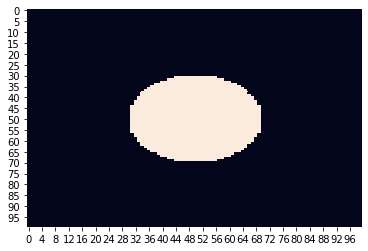

In [5]:
fig, ax = plt.subplots()

# https://stackoverflow.com/questions/33742845/how-to-animate-a-seaborns-heatmap-or-correlation-matrix
# https://gist.github.com/iwatake2222/43b1d8bc1dcfd2f0bf19a81486985d59
#https://stackoverflow.com/questions/53917596/how-to-make-jupyter-html-matplotlib-animation-with-seaborn-heatmap


jump = 1
def update(i):
    sns.heatmap(u[jump * i, :, :], ax=ax, cbar=False)
    
# super slow. Totally hopeless ...
ani = animation.FuncAnimation(fig, update, frames=int(nt/jump))

IndexError: index 100 is out of bounds for axis 0 with size 99

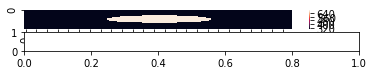

In [6]:
for i in range(10):
    plt.subplot(10, 1,i+1)
    
    col = sns.heatmap(u[i*100,:,:])

In [ ]:
ani.save('heat.mp4')

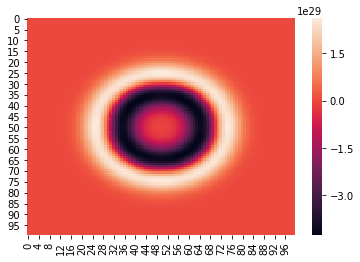

In [15]:
sns.heatmap(u[-1, :, :])